In [1]:
###### Machine Learning Libraries ######

import numpy as np
import pandas as pd
import scipy as shc
import nltk
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor

###### Deep Learning Libraries ######

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU, Conv2D, MaxPool2D, AveragePooling2D, Flatten, LSTM, Bidirectional, Embedding
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, Huber, Hinge, MSE, MAE
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
###### Load the dataset ######
df = pd.read_csv('/content/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
###### Remove the tweet_id column ######
df.drop(['2401', 'Borderlands'], axis = 1, inplace = True)

print("olumn is deleted.\n\n")

df.head()

olumn is deleted.




,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [4]:
###### Column name is changed ######
df.rename(columns = {'Positive': 'target', 'im getting on borderlands and i will murder you all ,': 'sentiment'}, inplace = True)

df.head()

,target,sentiment
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [5]:
##### Check duplicate ######
print("Duplicated records are in this dataset = ", df.duplicated().sum())

Duplicated records are in this dataset =  4909


In [6]:
###### Drop all duplicated dataset ######
df.drop_duplicates(inplace = True)

print("Duplicated recoreds are deleted.")

Duplicated recoreds are deleted.


In [7]:
###### Show the number of records in the dataset ######
print("# of rows in this dataset is = ", df.shape[0],'\n')
print("# of column in this dataset  = ", df.shape[1])

# of rows in this dataset is =  69772 

# of column in this dataset  =  2


In [8]:
####### Show the dataset is imbalanced or not ######
df.loc[:, 'target'].value_counts()

Negative      21238
Positive      19138
Neutral       17111
Irrelevant    12285
Name: target, dtype: int64

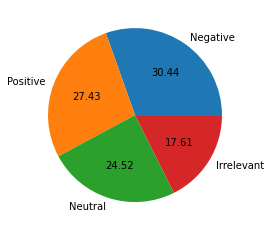

In [9]:
###### Show this in the pie chart ######
plt.pie(df.loc[:, 'target'].value_counts(), labels = ['Negative', 'Positive', 'Neutral', 'Irrelevant'], autopct = "%0.2f")
plt.show()

In [10]:
###### Label Encoding in the target column ######
from sklearn.preprocessing import LabelEncoder

label_encoder_ = LabelEncoder()
df.loc[:, 'target'] = label_encoder_.fit_transform(df.loc[:, 'target'])

df.head()

,target,sentiment
0,3,I am coming to the borders and I will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


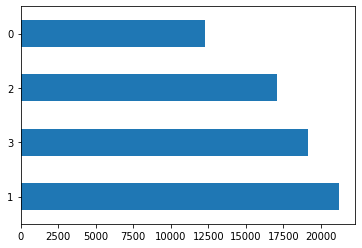

In [11]:
###### Count the target column manually ######
df.loc[:, 'target'].value_counts().plot(kind = 'barh')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69772 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     69772 non-null  int64 
 1   sentiment  69768 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


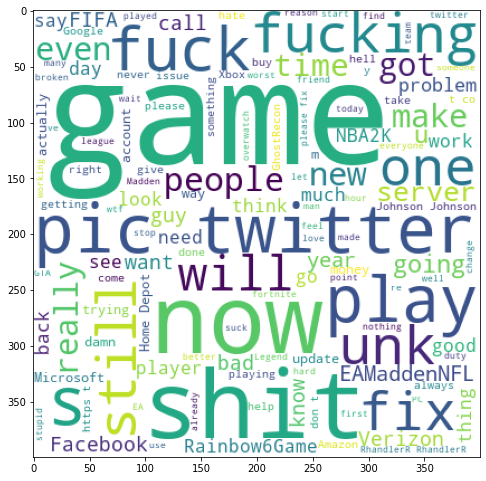

In [13]:
###### show the most frequent word in the Negative = 1 ######
plt.figure(figsize = (8, 10))
word_cloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
word_cloud_.generate(df.loc[df.loc[:, 'target'] == 1, 'sentiment'].str.cat(sep = ''))

plt.imshow(word_cloud_)
plt.show()

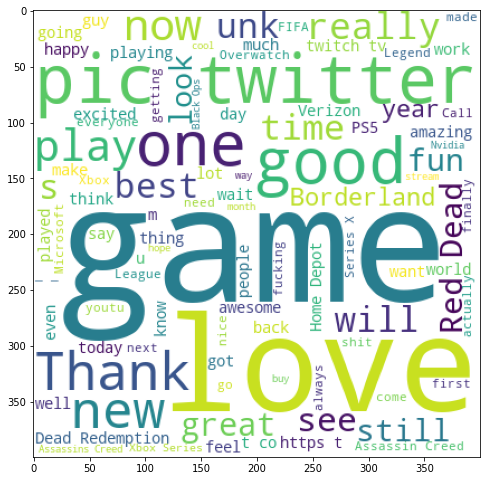

In [14]:
###### show the most frequent word in the Positive = 3 ######
plt.figure(figsize = (8, 10))
word_cloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
word_cloud_.generate(df.loc[df.loc[:, 'target'] == 3, 'sentiment'].str.cat(sep = ''))

plt.imshow(word_cloud_)
plt.show()

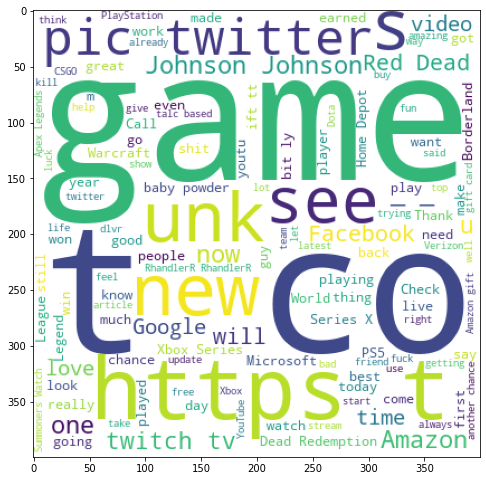

In [15]:
###### show the most frequent word in the Neutral = 2 ######
plt.figure(figsize = (8, 10))
word_cloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
word_cloud_.generate(df.loc[df.loc[:, 'target'] == 2, 'sentiment'].str.cat(sep = ''))

plt.imshow(word_cloud_)
plt.show()

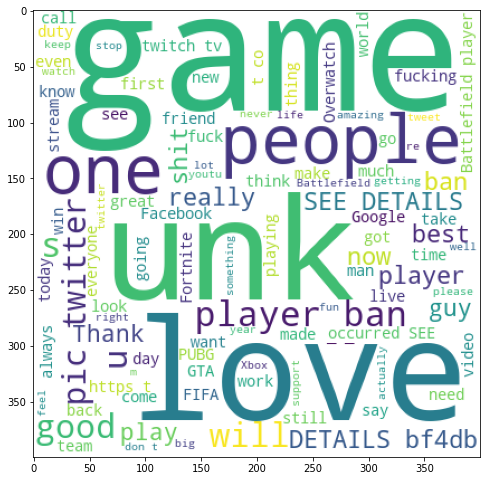

In [16]:
###### show the most frequent word in the Irrelevant = 0 ######
plt.figure(figsize = (8, 10))
word_cloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
word_cloud_.generate(df.loc[df.loc[:, 'target'] == 0, 'sentiment'].str.cat(sep = ''))

plt.imshow(word_cloud_)
plt.show()

In [17]:
###### Lowering the dataset #######
df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].astype(str)
df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].apply(lambda x: x.lower())

df.head()

,target,sentiment
0,3,i am coming to the borders and i will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [18]:
##### Remove all tagline from the dataset #####
def removeHTML(record_):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub(CLEANR, '', record_)
  return cleantext

df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].apply(removeHTML)

df.head()

,target,sentiment
0,3,i am coming to the borders and i will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands 2 and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [19]:
###### Take only words from the dataset ######
def removeHTML(record_):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub('[^a-zA-Z]', ' ', record_)
  return cleantext

df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].apply(removeHTML)

df.head()

,target,sentiment
0,3,i am coming to the borders and i will kill you...
1,3,im getting on borderlands and i will kill you ...
2,3,im coming on borderlands and i will murder you...
3,3,im getting on borderlands and i will murder ...
4,3,im getting into borderlands and i can murder y...


In [20]:
###### Remove all stopwords from the dataset ######
def removestopwords(record_):
  clean_text_ = []

  for word_ in word_tokenize(record_):
    if word_ in stopwords.words('english'):
      pass
    else:
      clean_text_.append(word_)
  
  return ' '.join(clean_text_)

df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].apply(removestopwords)

df.head()

,target,sentiment
0,3,coming borders kill
1,3,im getting borderlands kill
2,3,im coming borderlands murder
3,3,im getting borderlands murder
4,3,im getting borderlands murder


In [21]:
###### Remove all stopwords from the dataset ######
WordNetLemmatizer_ = WordNetLemmatizer()
def lemmatize(record_):
  clean_text_ = []

  for word_ in word_tokenize(record_):
    clean_text_.append(WordNetLemmatizer_.lemmatize(word_, pos = 'v'))
  
  return ' '.join(clean_text_)

df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].apply(lemmatize)

df.head()

,target,sentiment
0,3,come border kill
1,3,im get borderlands kill
2,3,im come borderlands murder
3,3,im get borderlands murder
4,3,im get borderlands murder


Bag of Words Used to Convert the words into Vectors

In [22]:
BOW_ = CountVectorizer()
X = BOW_.fit_transform(df.loc[:, 'sentiment'][0:5000]).toarray()
X.shape

(5000, 4631)

In [23]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(X, df.loc[:, 'target'][0:5000], test_size = 0.20, random_state = 42, stratify = df.loc[:, 'target'][0:5000])

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (4000, 4631)
y_train shape is =  (4000,)
X_test  shape is =  (1000, 4631)
y_test  shape is =  (1000,)


In [24]:
###### GaussianNB, BernoulliNB, MultinomialNB ######

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'micro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'micro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'micro'))

accuracy score is =  0.787
recall score is   =  0.787
f1 score of its   =  0.787
precision score is=  0.787


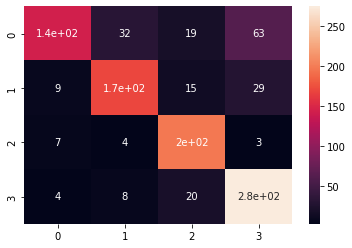

In [25]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

In [26]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.771
recall score is   =  0.8712824412663276
f1 score of its   =  0.7614683498290997
precision score is=  0.7235888567749749


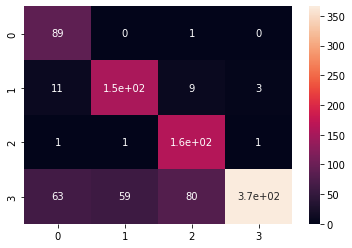

In [27]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

In [28]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.804
recall score is   =  0.8320604607521669
f1 score of its   =  0.7953330197663728
precision score is=  0.7761483975753408


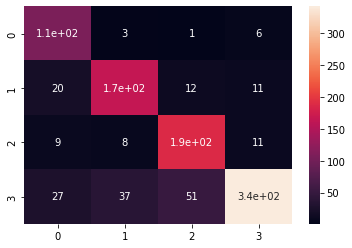

In [29]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

In [30]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.903
recall score is   =  0.9167194381343856
f1 score of its   =  0.9023960094104924
precision score is=  0.89214088840542


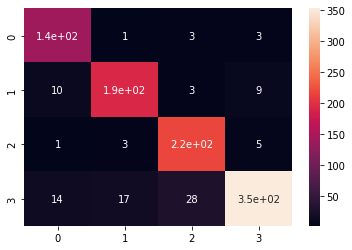

In [31]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

In [32]:
###### MLP Classifier #######

MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)
predicted_ = MLPClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.898
recall score is   =  0.9024107720678874
f1 score of its   =  0.8971293503011867
precision score is=  0.8927978325943906


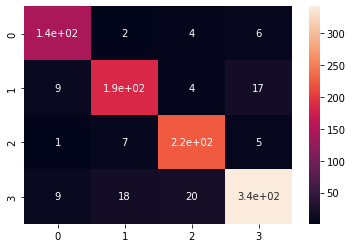

In [33]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

In [34]:
###### RandomForest Classifier ######
RandomForestClassifier_ = RandomForestClassifier()
RandomForestClassifier_.fit(X_train, y_train)
predicted_ = RandomForestClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.907
recall score is   =  0.9210259741123243
f1 score of its   =  0.9051337410130448
precision score is=  0.89454425158494


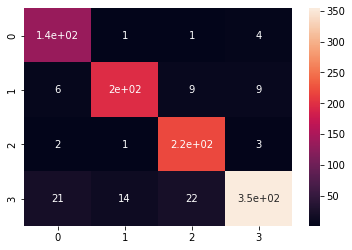

In [35]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

In [36]:
###### Xgboost Classifier ######
XGBClassifier_ = XGBClassifier()
XGBClassifier_.fit(X_train, y_train)
predicted_ = XGBClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.595
recall score is   =  0.7341325800453102
f1 score of its   =  0.5417804716462663
precision score is=  0.518792317587052


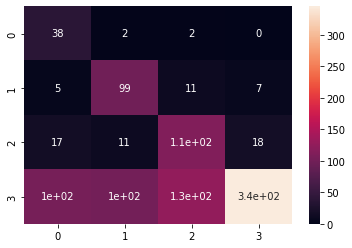

In [37]:
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)

TF-IDF Used to Convert words into vectors 


In [38]:
TFIDF_ = TfidfVectorizer(max_features = 1000, binary = True)
X = TFIDF_.fit_transform(df.loc[:, 'sentiment'][0:5000]).toarray()

###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(X, df.loc[:, 'target'][0:5000], test_size = 0.20, random_state = 42, stratify = df.loc[:, 'target'][0:5000])

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (4000, 1000)
y_train shape is =  (4000,)
X_test  shape is =  (1000, 1000)
y_test  shape is =  (1000,)


In [39]:
###### GaussianNB, BernoulliNB, MultinomialNB ######

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.631
recall score is   =  0.6809326315750366
f1 score of its   =  0.6368500008133908
precision score is=  0.6668359333477866


In [40]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.722
recall score is   =  0.7710832568144971
f1 score of its   =  0.6951645304586481
precision score is=  0.6722088165699973


In [41]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.722
recall score is   =  0.7710832568144971
f1 score of its   =  0.6951645304586481
precision score is=  0.6722088165699973


In [42]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.822
recall score is   =  0.8279663366620529
f1 score of its   =  0.8175751821368352
precision score is=  0.8118016360494136


LSTM RNN Used to predict this model

In [43]:
##### Find the number of unique vocabulary in this dataframe ######
tokenizer_ = Tokenizer()
tokenizer_.fit_on_texts(df.loc[:, 'sentiment'][0:5000])
voc_size_ = tokenizer_.word_index
voc_size_ = len(voc_size_) + 1

print("# of unique vocabulary size in this dataframe is : ", voc_size_,'\n')

# of unique vocabulary size in this dataframe is :  4650 



In [44]:
##### One Hot Representation #####
one_hot_ = [one_hot(record_, voc_size_) for record_ in df.loc[:, 'sentiment'][0:5000]]

print(one_hot_)

[[2481, 860, 2859], [2993, 2634, 1984, 2859], [2993, 2481, 1984, 1371], [2993, 2634, 1984, 1371], [2993, 2634, 1984, 1371], [3039, 3055, 3686, 1351, 1271, 3809, 3336, 1984, 3118, 1407, 540, 1071, 2578, 1055, 3686, 732, 4167, 1060, 2334, 3665, 919, 3686, 1436, 2099, 2117, 3944, 1930, 267, 4316], [3039, 3788, 3055, 1351, 1271, 3809, 3336, 1984, 3118, 1407, 540, 1071, 2578, 1055, 3686, 732, 4167, 1060, 2623, 4633, 919, 3686, 1271, 2099, 2117, 3944, 1930, 267, 4316], [3039, 3055, 1351, 1271, 3809, 3336, 1984, 3118, 1407, 540, 1071, 2578], [3039, 3055, 3686, 1351, 1271, 3809, 3336, 2381, 3118, 1407, 540, 1071, 2578, 1055, 3686, 732, 4167, 1060, 2334, 3665, 919, 3686, 1436, 2099, 2117, 3944, 1930, 267, 4316], [3039, 3055, 3686, 1351, 1271, 3809, 3336, 2381, 3118, 1407, 540, 1071, 2578, 1055, 3686, 732, 4167, 1060, 2334, 3665, 919, 3686, 1436, 2099, 2117, 3944, 1930, 267, 4316], [], [2466, 1170, 3429, 3134, 1177, 1596, 3970, 3798, 1984, 318, 3831, 2682], [2466, 1170, 3429, 3134, 1177, 1596, 3

In [45]:
##### Find the maxlen of the list #####
maxlen_ = -1

for list_ in one_hot_:
  if len(list_) > maxlen_:
    maxlen_ = len(list_)
  else:
    pass

print("The maximum length of this list = ", maxlen_)

The maximum length of this list =  99


In [46]:
##### Embedded doc #####
embedded_doc_ = pad_sequences(one_hot_, padding = 'pre', maxlen = maxlen_ + 1)

print(embedded_doc_)

[[   0    0    0 ... 2481  860 2859]
 [   0    0    0 ... 2634 1984 2859]
 [   0    0    0 ... 2481 1984 1371]
 ...
 [   0    0    0 ...  952 1334 3008]
 [   0    0    0 ...  952 1334 3008]
 [   0    0    0 ...  668 1334 3008]]


In [47]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(embedded_doc_, df.loc[:, 'target'][0:5000], test_size = 20, random_state = 42, stratify = df.loc[:, 'target'][0:5000])

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (4980, 100)
y_train shape is =  (4980,)
X_test  shape is =  (20, 100)
y_test  shape is =  (20,)


In [48]:
##### LSTM used to predict the model #####

model = Sequential()

##### Create an embedded layer #####
model.add(Embedding(input_dim = voc_size_, output_dim = 100, input_length = maxlen_ + 1))
model.add(Dropout(0.5))

##### Create LSTM with 100 neurons #####
model.add(LSTM(units = 100))
model.add(Dropout(0.6))

##### Create an output layer #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Fit the model and run #####
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 64, verbose = 1)

Epoch 1/20
78/78 [==============================] - 7s 14ms/step - loss: 1.3049 - accuracy: 0.4036 - val_loss: 1.1474 - val_accuracy: 0.6000
Epoch 2/20
78/78 [==============================] - 1s 8ms/step - loss: 0.8806 - accuracy: 0.6514 - val_loss: 0.5836 - val_accuracy: 0.8500
Epoch 3/20
78/78 [==============================] - 1s 8ms/step - loss: 0.4607 - accuracy: 0.8442 - val_loss: 0.3102 - val_accuracy: 0.9000
Epoch 4/20
78/78 [==============================] - 1s 8ms/step - loss: 0.3004 - accuracy: 0.8988 - val_loss: 0.2039 - val_accuracy: 0.9500
Epoch 5/20
78/78 [==============================] - 1s 8ms/step - loss: 0.2102 - accuracy: 0.9285 - val_loss: 0.1065 - val_accuracy: 0.9500
Epoch 6/20
78/78 [==============================] - 1s 8ms/step - loss: 0.1700 - accuracy: 0.9424 - val_loss: 0.1499 - val_accuracy: 0.9500
Epoch 7/20
78/78 [==============================] - 1s 8ms/step - loss: 0.1467 - accuracy: 0.9488 - val_loss: 0.1164 - val_accuracy: 0.9500
Epoch 8/20
78/78 [=

In [49]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

accuracy is   =  1.0
recall is     =  1.0
precision is  =  1.0
f1 score is   =  1.0


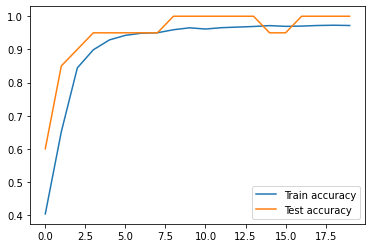

In [50]:
###### plot the accuracy and val_accuracy ######
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

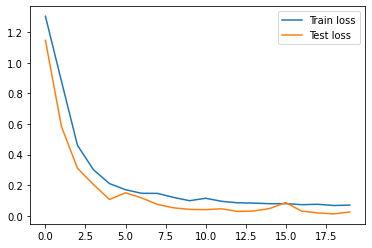

In [51]:
###### plot the loss and val_loss ######
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [78]:
def sentence_cleaning(sentence):
    """Pre-processing sentence for prediction"""
    stemmer = PorterStemmer()
    corpus = []
    # text = re.sub("[^a-zA-Z]", " ", sentence)
    text = sentence
    text = text.lower()
    text = word_tokenize(text)
    text = [WordNetLemmatizer_.lemmatize(word, pos = 'v') for word in text if word not in stopwords.words('english')]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=voc_size_) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=maxlen_ + 1, padding='pre')
    return pad

In [91]:
sentences = ["i hate to read book", "i love you", "let me do this work", "I am feeling to fuck you", "there is no need to go at home"]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = label_encoder_.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  (model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i hate to read book
Negative : [[0.01278135 0.9435407  0.00488056 0.03879746]]


i love you
Positive : [[0.0251875  0.00984963 0.02831551 0.93664736]]


let me do this work
Irrelevant : [[0.86859554 0.04832134 0.03531232 0.04777081]]


I am feeling to fuck you
Negative : [[0.01787725 0.9518006  0.00483712 0.02548498]]


there is no need to go at home
Positive : [[1.53555273e-04 1.14806506e-04 1.99280377e-03 9.97738838e-01]]




Bidirectional LSTM 


In [92]:
##### LSTM used to predict the model #####

model = Sequential()

##### Create an embedded layer #####
model.add(Embedding(input_dim = voc_size_, output_dim = 100, input_length = maxlen_ + 1))
model.add(Dropout(0.5))

##### Create LSTM with 100 neurons #####
model.add(Bidirectional(LSTM(units = 60)))
model.add(Dropout(0.6))

##### Create an output layer #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### Fit the model and run #####
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 64, verbose = 1)

Epoch 1/20
78/78 [==============================] - 4s 21ms/step - loss: 1.3155 - accuracy: 0.3871 - val_loss: 1.1967 - val_accuracy: 0.5500
Epoch 2/20
78/78 [==============================] - 1s 11ms/step - loss: 0.9647 - accuracy: 0.6090 - val_loss: 0.7115 - val_accuracy: 0.8000
Epoch 3/20
78/78 [==============================] - 1s 11ms/step - loss: 0.5367 - accuracy: 0.8243 - val_loss: 0.3409 - val_accuracy: 0.9500
Epoch 4/20
78/78 [==============================] - 1s 12ms/step - loss: 0.3360 - accuracy: 0.8958 - val_loss: 0.2102 - val_accuracy: 0.9500
Epoch 5/20
78/78 [==============================] - 1s 12ms/step - loss: 0.2422 - accuracy: 0.9223 - val_loss: 0.2023 - val_accuracy: 0.9000
Epoch 6/20
78/78 [==============================] - 1s 12ms/step - loss: 0.1985 - accuracy: 0.9329 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 7/20
78/78 [==============================] - 1s 12ms/step - loss: 0.1634 - accuracy: 0.9480 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 8/20
78

In [93]:
y_pred = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

1/1 [==============================] - 1s 684ms/step
accuracy is   =  1.0
recall is     =  1.0
precision is  =  1.0
f1 score is   =  1.0


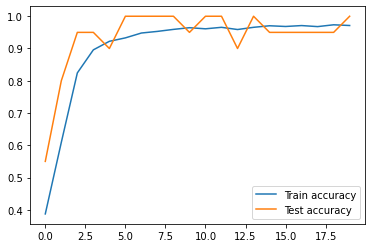

In [94]:
###### plot the accuracy and val_accuracy ######
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

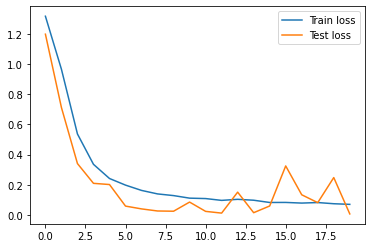

In [95]:
###### plot the loss and val_loss ######
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [96]:
def sentence_cleaning(sentence):
    """Pre-processing sentence for prediction"""
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = sentence
    text = text.lower()
    text = word_tokenize(text)
    text = [WordNetLemmatizer_.lemmatize(word, pos = 'v') for word in text if word not in stopwords.words('english')]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=voc_size_) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=maxlen_ + 1, padding='pre')
    return pad

In [97]:
sentences = ["i hate to read book", "i love you", "let me do this work", "I am feeling to fuck you", "there is no need to go at home"]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = label_encoder_.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  (model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i hate to read book
Positive : [[0.04567812 0.34524435 0.01701203 0.5920655 ]]


i love you
Positive : [[0.03676319 0.01272103 0.03896549 0.9115503 ]]


let me do this work
Irrelevant : [[0.84508896 0.0422341  0.01511212 0.09756494]]


I am feeling to fuck you
Negative : [[0.04308668 0.9199771  0.00846943 0.02846678]]


there is no need to go at home
Positive : [[0.00127631 0.00314176 0.02575042 0.9698315 ]]




In [66]:
df.loc[:, 'target'].value_counts() 

"""
Negative      21238 -1
Positive      19138 -3
Neutral       17111- 2
Irrelevant -0
"""

1    21238
3    19138
2    17111
0    12285
Name: target, dtype: int64

In [82]:
df.loc[:, 'sentiment'][1]

'im get borderlands kill'